<a href="https://colab.research.google.com/github/undefinedzack/stock-market-prediction-using-sentiment-analysis/blob/master/stock_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

import yfinance

dataframe = yfinance.download("DIS", 
                              "2010-01-01", 
                              "2020-09-01", 
                              auto_adjust=True)

dataframe = dataframe[["Close"]]

dataframe = dataframe.dropna()

dataframe

     |████████████████████████████████| 5.5MB 6.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=7914e16c6709265fcbb5f06148ec8f8db388e324057202660ae664c7629f1758
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
[*********************100%***********************]  1 of 1 completed


,Close
Date,
2010-01-04,27.933924
2010-01-05,27.864237
2010-01-06,27.716166
2010-01-07,27.724878
2010-01-08,27.768419
...,...
2020-08-25,129.789993
2020-08-26,132.179993
2020-08-27,133.729996


Text(0.5, 1.0, 'Disney Stock - 2010-2020')

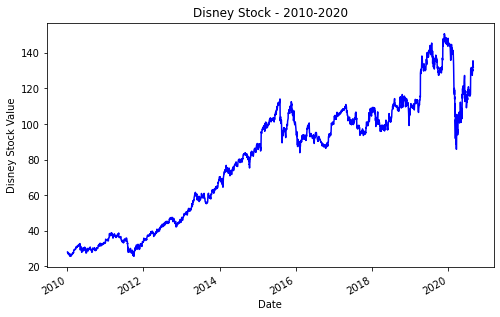

In [ ]:
import matplotlib.pyplot as pyplot

dataframe.Close.plot(figsize = (8, 5), 
                     color   = "b")

pyplot.ylabel("Disney Stock Value")

pyplot.title("Disney Stock - 2010-2020")

In [ ]:
dataframe["five_days_moving_average"]   = dataframe["Close"].rolling(window=5).mean()
# dataframe["five_days_moving_average"] 

dataframe["twenty_days_moving_average"] = dataframe["Close"].rolling(window=20).mean()

dataframe = dataframe.dropna()

X = dataframe[["five_days_moving_average", 
               "twenty_days_moving_average"]]

dataframe["value_next_day"]             = dataframe["Close"].shift(-1)

dataframe = dataframe.dropna()

y = dataframe["value_next_day"]

y

Date
2010-03-01     27.768419
2010-03-02     27.559378
2010-03-03     28.369436
2010-03-04     28.935610
2010-03-05     28.909479
                 ...    
2020-08-21    130.690002
2020-08-24    129.789993
2020-08-25    132.179993
2020-08-26    133.729996
2020-08-27    135.539993
Name: value_next_day, Length: 2644, dtype: float64

In [ ]:
split_index = 0.8

split_index = split_index * len(dataframe)

split_index = int(split_index) 

X_train = X[:split_index]
y_train = y[:split_index]

X_test  = X[split_index:]
y_test  = y[split_index:] 

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model = model.fit(X_train, 
                  y_train)

five_day_moving_average   = model.coef_[0]

twenty_day_moving_average = model.coef_[1]

print(five_day_moving_average)
print(twenty_day_moving_average)

constant = model.intercept_

print(constant)

1.1520923418091409
-0.15325658324576552
0.15406263029224476


Text(0, 0.5, 'Disney Stock Value')

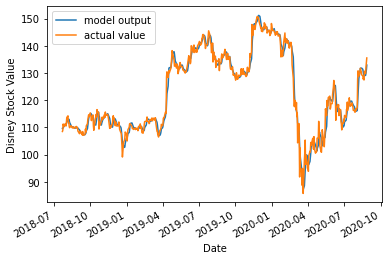

In [ ]:
test_output = model.predict(X_test)

import pandas

y_test = y[(split_index - 1):]

test_output = pandas.DataFrame(test_output,
                              index = y_test.index,
                              columns = ["value"])

test_output.plot()

y_test.plot()

pyplot.legend(["model output",
               "actual value"])

pyplot.ylabel("Disney Stock Value")

In [ ]:
score = model.score(X[split_index:],
                    y[(split_index - 1):])

score = score * 100

print(score)

97.40291565249456


Text(0, 0.5, 'Cumulative Returns')

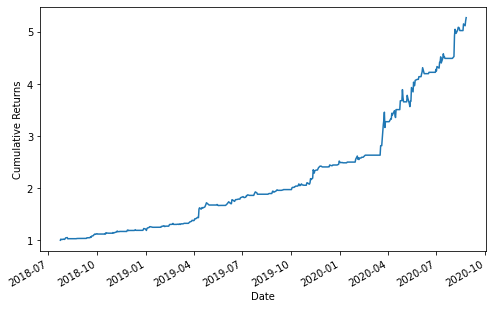

In [ ]:
stock = pandas.DataFrame()

stock["value"] = dataframe[split_index:]["Close"]

stock["predicted_tomorrow"] = test_output

stock["actual_tomorrow"] = y_test

stock["returns"] = stock["value"].pct_change().shift(-1)

import numpy

stock["strategy"] = numpy.where(stock.predicted_tomorrow.shift(1) < stock.predicted_tomorrow,
                                1,
                                0)

stock["strategy_returns"] = stock.strategy * stock["returns"]

cumulative_product = (stock["strategy_returns"] + 1).cumprod()

cumulative_product.plot(figsize = (8, 5))

pyplot.ylabel("Cumulative Returns")

In [ ]:
dataset = yfinance.download("DIS",
                            "2010-01-01",
                            "2020-09-01",
                            auto_adjust = True)

dataset["five_day_average"]   = dataset["Close"].rolling(window = 5).mean()

dataset["twenty_day_average"] = dataset["Close"].rolling(window = 20).mean()

dataset = dataset.dropna()

dataset["predicted_stock_value"] = model.predict(dataset[["five_day_average",
                                                       "twenty_day_average"]])

dataset["strategy"] = numpy.where(dataset.predicted_stock_value.shift(1) < dataset.predicted_stock_value,
                                 "Buy",
                                 "Hold/Sell")

print(dataset)

[*********************100%***********************]  1 of 1 completed
                  Open        High  ...  predicted_stock_value   strategy
Date                                ...                                  
2010-02-01   25.782479   25.930555  ...              25.633992  Hold/Sell
2010-02-02   25.721504   26.139598  ...              25.712165        Buy
2010-02-03   26.061204   26.888683  ...              26.007442        Buy
2010-02-04   26.374781   26.557697  ...              26.086017        Buy
2010-02-05   25.808608   25.991525  ...              26.099295        Buy
...                ...         ...  ...                    ...        ...
2020-08-25  130.830002  131.089996  ...             129.152127        Buy
2020-08-26  130.000000  132.600006  ...             130.041299        Buy
2020-08-27  133.000000  136.360001  ...             131.195479        Buy
2020-08-28  134.500000  136.800003  ...             132.919338        Buy
2020-08-31  135.250000  135.539993  ...    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
